# Homework 1 Solution Question 2

In [1]:
#importing libraries
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#opening the data files for data 1
with open('data_1.csv') as csvfile:
    x_1=[]
    y_1=[]
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[0].isdigit() == True: #removing x and y
            x_1.append(float(row[0]))
            y_1.append(float(row[1]))

In [3]:
#opening the data files for data 2
with open('data_2.csv') as csvfile:
    x_2=[]
    y_2=[]
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        if row[0].isdigit() == True: #removing x and y
            x_2.append(float(row[0]))
            y_2.append(float(row[1]))

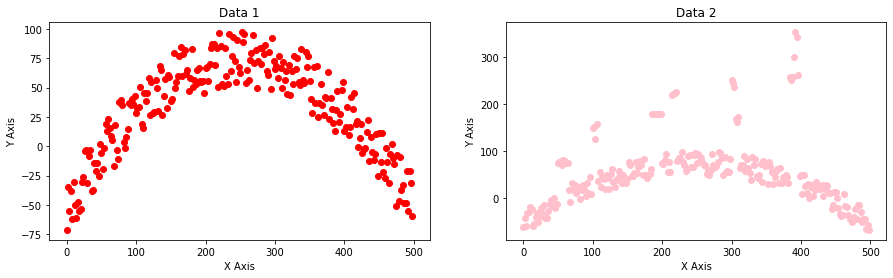

In [4]:
#plotting graph 1
fig = plt.figure(figsize=(15,4))
plt.subplot(121)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.scatter(x_1,y_1,c='red')
plt.title('Data 1')
#plotting graph 2
plt.subplot(122)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Data 2')
plt.scatter(x_2,y_2,c='pink')

In [5]:
#Using total least square error

In [6]:
#error calculation
#all the tables that are necessary are written here 
x_1_p2 = []
xy = []
x_p2_y = []
x_1_p3 = []
x_1_p4 = []

In [7]:
#adding all elements to the list
for i in range(len(x_1)):
    x_1_p2.append(float(x_1[i]**2))
    xy.append(float(x_1[i]*y_1[i]))
    x_p2_y.append(float((x_1[i]**2)*y_1[i]))
    x_1_p3.append(float(x_1[i]**3))
    x_1_p4.append(float(x_1[i]**4))

In [8]:
#initializing all sums to zero
sum_n = 0.0
sum_x_1=0.0
sum_y_1=0.0
sum_x_1_p2 =0.0
sum_xy =0.0
sum_x_p2_y =0.0
sum_x_1_p3 = 0.0
sum_x_1_p4 =0.0

#finding all sums in the table
for i in range(len(x_1)):
    sum_n = sum_n + i
    sum_x_1=sum_x_1+x_1[i]
    sum_y_1=sum_y_1+y_1[i]
    sum_x_1_p2 =sum_x_1_p2 + x_1_p2[i]
    sum_xy =sum_xy+xy[i]
    sum_x_p2_y =sum_x_p2_y+x_p2_y[i]
    sum_x_1_p3 = sum_x_1_p3+x_1_p3[i]
    sum_x_1_p4 = sum_x_1_p4 + x_1_p4[i]


In [9]:
#three equations to find a b and c are >>> 

# sum_y_1 = a*sum_x_1_p2 + b*sum_x_1 + c*sum_n
# sum_xy = a*sum_x_1_p3 + b*sum_x_1_p2 + c*sum_x_1
# sum_x_p2_y = a*sum_x_1_p4 + b*sum_x_1_p3 + c*sum_x_1_p2

#just for showcasing the theory

In [10]:
#finding the solution for the above set of linear equations
a= np.array([[sum_x_1_p2,sum_x_1,sum_n],[sum_x_1_p3,sum_x_1_p2,sum_x_1],[sum_x_1_p4,sum_x_1_p3,sum_x_1_p2]])
b=np.array([sum_y_1,sum_xy,sum_x_p2_y])


In [11]:
from numpy import linalg as LA
def Compute_Svd(A):                              #function definition for svd calculation
    AT=A.T                                       #transpose
    AAT=A.dot(AT)
    eigenvalue_U,eigenvector_U=LA.eig(AAT)
    sort_val1 = eigenvalue_U.argsort()[::-1]
    new_eigenvalue_U = eigenvalue_U[sort_val1]
    new_eigenvector_U = eigenvector_U[:,sort_val1]
    #temp = np.diag((np.sqrt(new_eigenvalue_U)))  #compute sigma matrix as a diagonal matrix with elements as square root of eigen values of U
    #sigma = np.zeros_like(A).astype(np.float64)
    #sigma[:temp.shape[0],:temp.shape[1]]=temp
    temp_1 = np.diag((np.sqrt((1/new_eigenvalue_U))))  #compute sigma matrix as a diagonal matrix with elements as square root of eigen values of U
    sigma_1 = np.zeros_like(A).astype(np.float64)
    sigma_1[:temp_1.shape[0],:temp_1.shape[1]]=temp_1
    VT_inter = sigma_1.dot(new_eigenvector_U.T)
    VT = VT_inter.dot(A)
    
    return new_eigenvector_U,sigma_1,VT

In [12]:
U,S_inv,VT = Compute_Svd(a)

In [13]:
sol_1 = VT.T.dot(S_inv.dot(U.T.dot(b)))
print("Co-efficients=",sol_1)
a = sol_1[0]
b = sol_1[1]
c = sol_1[2]

Co-efficients= [-0.00131575  0.59081898 -0.04734542]


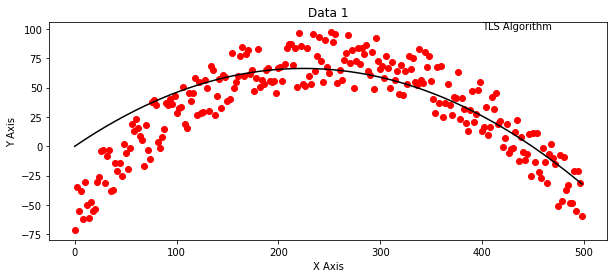

In [14]:
y_new=[]#empty list 

for i in range(0,len(x_1)):
    y = (a*(x_1[i]**2))+(b*x_1[i]) + c
    y_new.append(y)
    
fig = plt.figure(figsize=(10,4))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Data 1')
plt.scatter(x_1,y_1,c='red')
plt.text(400,100,'TLS Algorithm')
plt.plot(x_1,y_new,'k')
plt.show()

In [15]:
#the end